In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
acktr = pd.read_csv("rl_train_res/acktr.csv")
trpo = pd.read_csv("rl_train_res/trpo.csv")
ppo = pd.read_csv("rl_train_res/ppo.csv")
fitre = pd.read_csv("rl_train_res/fitre.csv")

data = pd.concat([ppo, fitre]) # acktr, trpo, 

<AxesSubplot:xlabel='training_iteration', ylabel='ep_rew'>

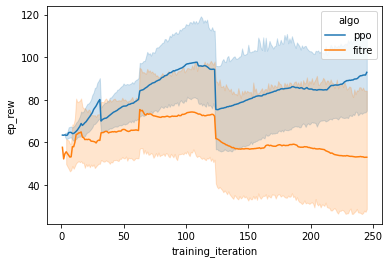

In [3]:
sns.lineplot(data=data,  x="training_iteration", y="ep_rew", hue="algo")

In [3]:
def top_k(df, k):
    topk_ind = df.groupby("training_iteration")["ep_rew"].nlargest(k).index
    topk_ind = [i[1] for i in topk_ind]
    return df.loc[topk_ind]

# Top 5

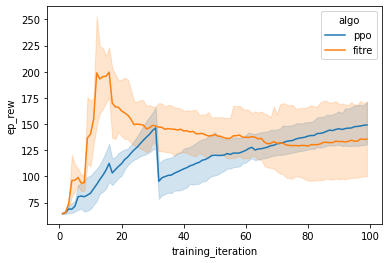

In [12]:
top_data = pd.concat([top_k(d, 5) for d in [ppo[ppo.training_iteration < 100], fitre[fitre.training_iteration < 100]]]) # acktr, trpo
ax = sns.lineplot(data=top_data,  x="training_iteration", y="ep_rew", hue="algo")

In [13]:
ax.get_figure().savefig("top-5.pdf")

# Top 10

<AxesSubplot:xlabel='training_iteration', ylabel='ep_rew'>

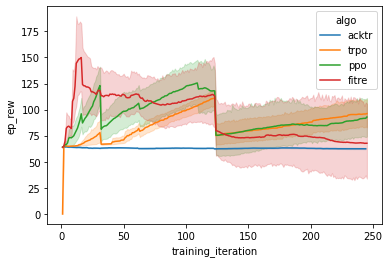

In [16]:
top_data = pd.concat([top_k(d, 10) for d in [acktr, trpo, ppo, fitre]])
sns.lineplot(data=top_data,  x="training_iteration", y="ep_rew", hue="algo")